# Working title: The effect of haptic stimuli on a immersive virtual reality motor 



## Introduction
    1.- Tactile Versus Haptic 

    2.- VR versus Inmersive VR

    3.-  Motor-Memory - How did we measure it ? Overview over other task (incld. mine) → why motor-memory? why would “haptic” stimuli be different than “non-haptic”
    
    Section 3:how did you measure it? - overview over other tasks (incl. yours) 

Closing remarks How VR is mainly visual. Sense of touch is important to mimic physical reality - technological challenge


## Methods

### Participants Descriptive Statistics 

There were a total of 23 participans who performed both of the full tasks. Nonetheless, 2 of them did not filled all questionaires therefore we had to leave them out and continue to performe the analysis with 21 participants. The call for participants was answer considerably more by women (17) than men (5). The age accorss the sample was consistenly around 25 years old, all but for one exception <br> ($\mu=25.1 , \sigma=6.3$).


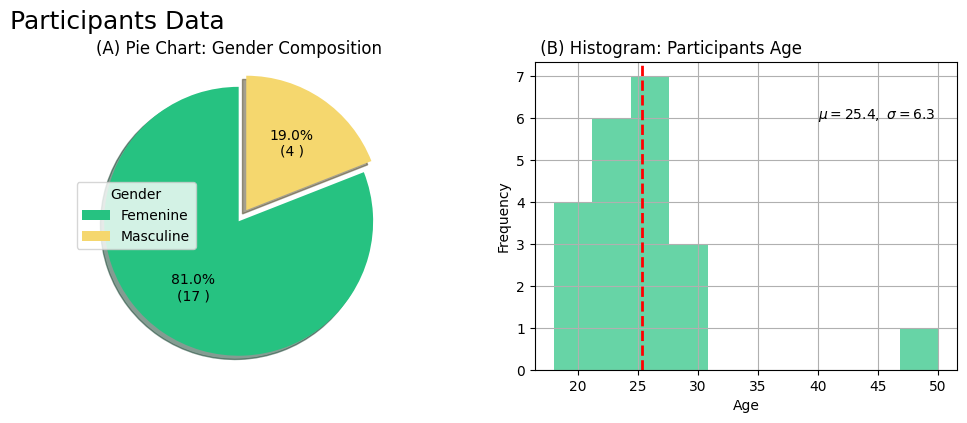

In [2]:
# Loading Libraries
import numpy as np  # not sure for what
import scipy as sp
import pandas as pd 
import seaborn as sb
import os 
import matplotlib.pyplot as plt

# Loading Data
notebook_path = os.path.abspath("metdata_analysis.py")
metadat1  = pd.read_csv(os.path.join(os.path.dirname(notebook_path), "Data","meta-data.csv"),na_values=" ")

metadat  = metadat1.drop([14, 22])

# Adding a Histogram with the Age Distribution and Pie Chart With Sex 
sigma = np.std(metadat.AGE)
mu = np.mean(metadat.AGE)
explode = (0.1,0)
SEX, allvals = np.unique(metadat.SEX, return_counts=True)
#colors
colors = ['#26C281','#F5D76E']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Participants Data', fontsize=18 ,x = 0.2, y = 1.01)

ax1.pie(allvals,explode=explode, colors=colors,autopct=lambda pct: func(pct, allvals),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend( ['Femenine','Masculine'],
          title="Gender",
          loc="center left",
          bbox_to_anchor=(0.1, 0, 0.5, 1))

#ax1.plt.setp( ['Femenine','Masculine'], size=8, weight="bold")

ax1.set_title("(A) Pie Chart: Gender Composition")

n, bins, patches = plt.hist(metadat.AGE, facecolor='#26C281', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(' (B) Histogram: Participants Age', loc='left')
plt.text(40,6, f'$\mu={mu:.1f},\ \sigma={sigma:.1f}$')
plt.axvline(mu, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.grid(True)
plt.show()

### Questionaires Measure

To asure that the handedness and VR sickness dispositions did not affect the measurment of hearbeat-count task and the motor-memory task, the participants perform the two following questionaires:  (**i) Edimburg Handedness Inventory (EHI) (`Caplan, B., Mendoza, J.E. (2011)`) (ii) Pre and Post Self-Elaborated Cybersickness Questionaire. (iii) Post-VR Experiment Questionnaire.**

(i) The results from the EHI show that all participants are right handed. A somewhat remarkable detail is that 3 o f the 4 Male participants had a laterality score around 80.

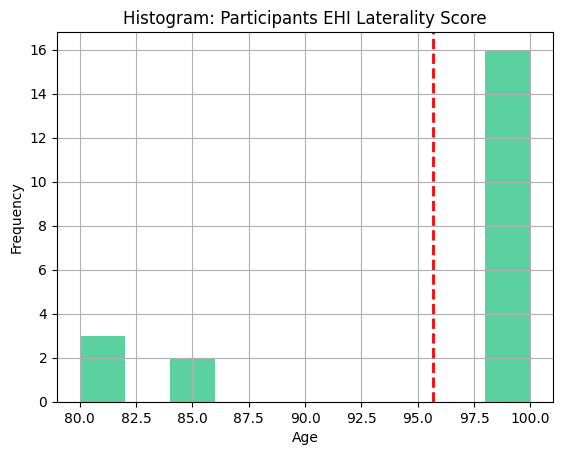

In [3]:
notebook_path = os.path.abspath("metdata_analysis.py")
metadat1  = pd.read_csv(os.path.join(os.path.dirname(notebook_path), "Data","meta-data.csv"),na_values=" ")
metadat  = metadat1.drop([14, 22])
laterality = metadat.loc[:,'EHQ1':'EHQ10']
stack = laterality.stack()
stack[stack ==5] = 0
stack[stack ==2] = -1
stack[stack ==1] = -2
stack[stack ==4] = 2
stack[stack ==3] = 1
metadat['laterality_s'] = (stack.unstack().sum(axis=1)/abs(stack.unstack()).sum(axis=1))*100

sigma = np.std(metadat.laterality_s)
mu = np.mean(metadat.laterality_s)

n, bins, patches = plt.hist(metadat.laterality_s, facecolor='#26C281', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram: Participants EHI Laterality Score')
#plt.text( f'$\mu={mu:.1f},\ \sigma={sigma:.1f}$')
plt.axvline(mu, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.grid(True)

(ii) The comparison between a Pre and Post VR-Cibersicknes Questionaire showed an increase in avarage Cibersickness for all participants partaking in the experiment. The test concisted of answering question on the presence or not of 16 different symptoms associated with the use of VR (e.g Tiredness, Strained Eyes, Confusion). We made the test with a 4 levels likert scale going from: "not present" (1), "somewhat present" (2), "clear" (3) and "very strong" (4). The overall results point towards symptoms "not present". We conduct a paired-samples t-test to compare the cybersickness levels before (pre) the Virtual Reality Expirience and After (post) the Virtual Reality Expirience. There was a significant difference in the scores for pre (M=1.10, SD=0.12) and post 2 (M=1.18, SD=0.19) conditions; t(21)=-2.65, p = 0.015. Moving on avarage from "not present" to "somewhat present". In all we think is fair to argue that there are symptoms to report. 

In [4]:
notebook_path = os.path.abspath("metdata_analysis.py")
metadat1  = pd.read_csv(os.path.join(os.path.dirname(notebook_path), "Data\\meta-data.csv"),na_values=" ")
metadat  = metadat1.drop([14, 22])
pre_score = metadat.loc[:,'pre_csq1':'pre_csq16'].sum(axis=1)
post_score = metadat.loc[:,'post_csq1':'post_csq16'].sum(axis=1)
mu = np.mean(pre_score/16)
sigma = np.std(pre_score/16)
mu1 = np.mean(post_score/16)
sigma1 = np.std(post_score/16)

fig, ax = plt.subplots()
ax.hist(pre_score/16, histtype="barstacked", bins=20, facecolor='#26C281' ,alpha=0.6)
ax.hist(post_score/16, histtype="barstacked", bins=20,facecolor='#757D75', alpha=0.6)
ax.axvline(mu, color = '#26C281', linestyle = 'dashed', linewidth = 2)
ax.axvline(mu1, color = '#757D75', linestyle = 'dashed', linewidth = 2)
ax.set_title("Pre and Post Cybersicknes Questionaire")
ax.legend(  [f'Pre VR $\mu={mu:.2f},\ \sigma={sigma:.2f}$',f'Post VR $\mu={mu1:.2f},\ \sigma={sigma1:.2f}$'],
          title="Gender",
          loc="center left",
          bbox_to_anchor=(0.45, 0.35, 0.5, 1))

plt.show()

stat, p = sp.stats.ttest_rel(pre_score, post_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')
    


FileNotFoundError: [Errno 2] No such file or directory: '/home/perdices/Dokumente/Github/m-b_thesis/OLD/Data\\meta-data.csv'

(iii) Post-VR Experiment Questionnaire was a 31 item questioaire with a 7 level likert scale with asnwers going from: "does not apply at all" (1), "does not apply" (2), "reather not applicable" (3), "niether nor applicable" (4), "reather applies" (5), "applies" (6), "totally applies" (7). The questions topics look into the participants expirience on percieved dificulty of the experiment, level of reality of the expirience, engagment and emobdidment assesments. This topics aim at noticing if the participants percieved certain theoretical goals that we will be able to corroborate with behavioral data. 

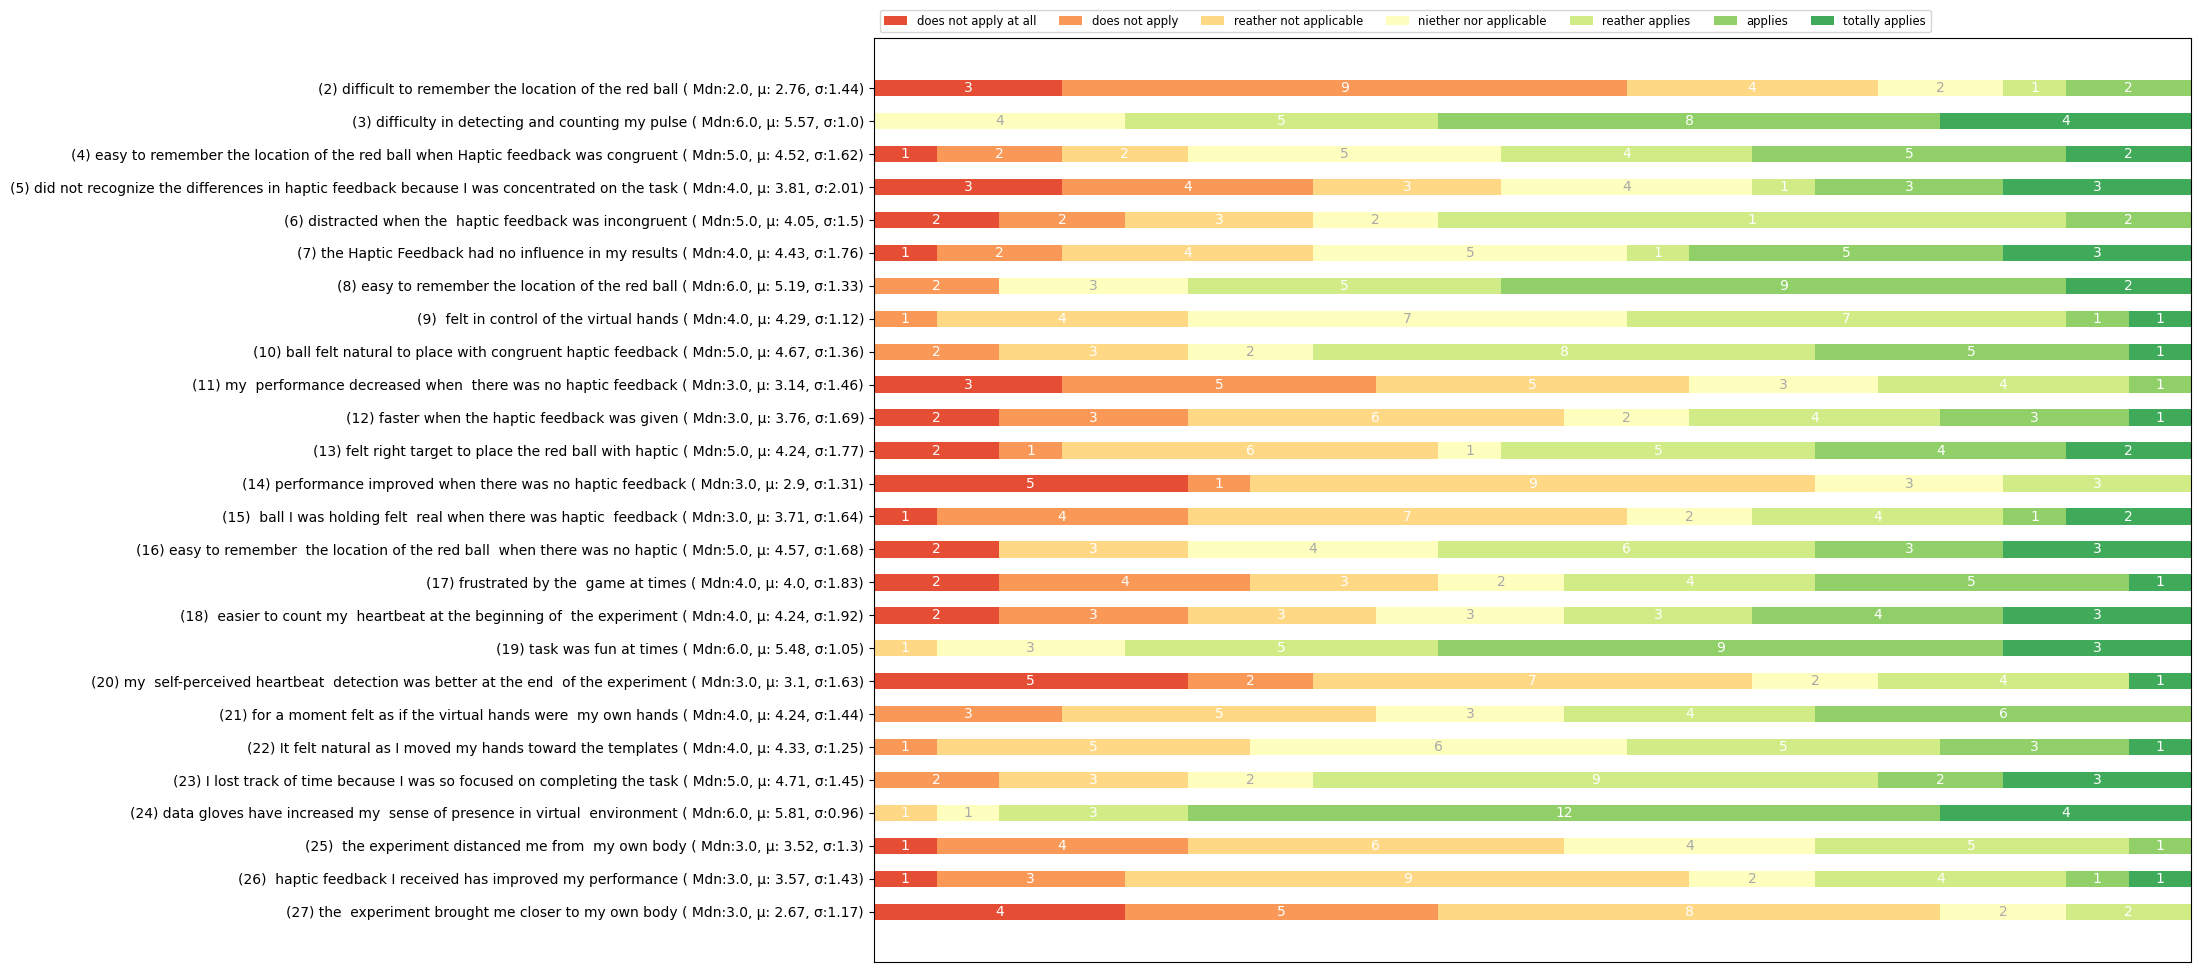

In [8]:
####### VRF Qestionaire
# Get the absolute path of the notebook file
#notebook_path = os.path.abspath("/home/perdices/Dokumente/Github/m-b_thesis/Analysis/meta-data.csv")

# Construct the path to the meta-data.csv file using os.path.join()
#data_directory = os.path.join(os.path.dirname(notebook_path), "Data")
#csv_file_path = os.path.join(data_directory, "meta-data.csv")

# Load the CSV file into a DataFrame
metadat1 = pd.read_csv('/home/perdices/Dokumente/Github/m-b_thesis/Analysis/meta-data.csv', na_values=" ")

# Drop rows with indices 14 and 22 from the DataFrame
metadat = metadat1.drop([14, 22])
#  
# The order of appearance in the list is relevant for the graph now its in desorder 
Questions = 'datagloves felt unnatural to wear','difficult to remember the location of the red ball',\
'difficulty in detecting and counting my pulse','easy to remember the location of the red ball when Haptic feedback was congruent',\
'did not recognize the differences in haptic feedback because I was concentrated on the task',\
'distracted when the  haptic feedback was incongruent',\
'the Haptic Feedback had no influence in my results',\
'easy to remember the location of the red ball',' felt in control of the virtual hands'\
,'ball felt natural to place with congruent haptic feedback', 'my  performance decreased when  there was no haptic feedback'\
,'faster when the haptic feedback was given', 'felt right target to place the red ball with haptic'\
,'performance improved when there was no haptic feedback', ' ball I was holding felt  real when there was haptic  feedback'\
,'easy to remember  the location of the red ball  when there was no haptic'\
,'frustrated by the  game at times', ' easier to count my  heartbeat at the beginning of  the experiment'\
,'task was fun at times', 'my  self-perceived heartbeat  detection was better at the end  of the experiment'\
,'for a moment felt as if the virtual hands were  my own hands','It felt natural as I moved my hands toward the templates',\
'I lost track of time because I was so focused on completing the task','data gloves have increased my  sense of presence in virtual  environment'\
,' the experiment distanced me from  my own body',' haptic feedback I received has improved my performance'\
,'the  experiment brought me closer to my own body'


    
    
        
       
category_names = [ "does not apply at all" , "does not apply" ,
                  "reather not applicable" , "niether nor applicable" , 
                  "reather applies" , "applies" , "totally applies" ,]
     
results = {
    f'({x}) ' + Questions[x-1]: {
        'counts': list(np.bincount(metadat[f'post_VRF{x}'], minlength=8)),
        'mean': round(np.mean(metadat[f'post_VRF{x}']),2),
        'stand dev': round(np.std(metadat[f'post_VRF{x}']),2),
        'median': round(np.median(metadat[f'post_VRF{x}']),2)

    }
    for x in range(2, 28)
}
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = [
    f"{key} ( Mdn:{results[key]['median']}, \u03BC: {results[key]['mean']}, \u03C3:{results[key]['stand dev']})"
    for key in results.keys()
]
    #data = np.array(list(results[key]['counts']))[:,1:8]
    data = np.array([result['counts'] + [0] * (8 - len(result['counts'])) for result in results.values()])[:,1:8]
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(17, 12))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels,widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
            # format the number of decimal places and replace 0 with an empty string
        #bar_labels = widths
        
        bar_labels = np.char.replace(list(map(str,widths)),'0','')  #widths[j] if widths[j] > 0 for j in enumerate(widths) else ''  
        ax.bar_label(rects,labels=bar_labels ,label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()
    


### Goal number two:
(ii) Assess the impact of passive haptic stimuli on the behavioral outcomes in IVR. By
examining how passive haptic stimuli influence (a) repose time and (b) accuracy in the
motor-memory task. Additionally, we will observe if there is a (c) difference in movement
between each condition.





Questions to look for while wrangling behavioral data and questionnaire
results:
Accuracy Wrangling:
1) Did the participants who rated “difficult to remember the location of the red ball” (Q2) in
positive scale (applies/rather applies) show also as failed accuracy in their behavioral data in terms of placing the ball in the correct location?





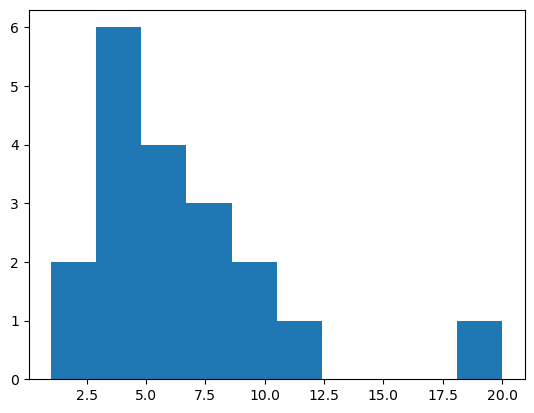

           accuracy
post_VRF2          
1.0           6.000
2.0           6.875
3.0           5.500
4.0           5.000
5.0           3.000
6.0           8.000


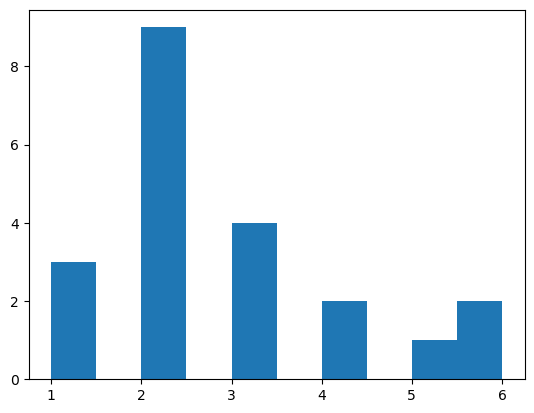

In [ ]:
behaviour  = pd.read_csv(os.path.join(os.path.dirname(notebook_path), "Data/behavior.csv"),na_values=" ")
behaviour["Stimulus"].value_counts()
behaviour["set"].value_counts()
notebook_path = os.path.abspath("metdata_analysis.py")
metadat1  = pd.read_csv(os.path.join(os.path.dirname(notebook_path), "Data\\meta-data.csv"),na_values=" ")
metadat  = metadat1.drop([14, 22])
# Removing failed trails 
behaviour_clean = behaviour.drop(behaviour[behaviour.set==0].index)
behaviour_clean = behaviour.drop(behaviour[behaviour.Stimulus==0].index)

smaller_behaviour= behaviour_clean.loc[:,["ptcp","accuracy"]].groupby('ptcp' , as_index = False).sum()
metadat["PARTICIPANT ID"] = metadat["PARTICIPANT ID"].str.lower() 
metadat["PARTICIPANT ID"] = [s.replace('_', '') for s in metadat["PARTICIPANT ID"]]
metadat = metadat.rename(columns={"PARTICIPANT ID":"ptcp"})
metadat_behaviour = pd.merge(metadat,
         smaller_behaviour,
         on="ptcp",
         how='left')
plt.hist(metadat_behaviour["accuracy"])
plt.show()
plt.hist(metadat_behaviour["post_VRF2"])
plt.show
pozoso = metadat_behaviour.loc[:,["post_VRF2","accuracy"]].groupby(["post_VRF2"]).mean()
print(pozoso)

2) The participants who rated “haptic feedback I felt did not influence my performance” (Q8) in
positive scale (applies/rather applies):
- Were they more accurate in no haptic condition, in comparison to other 2 conditions?


3) The participants who rated “easy to remember the location of the ball when there was no haptic
feedback” positive scale (applies/rather applies): (Q17):
- Did they really score more correct position of the ball in the no haptic feedback condition?